In [1]:
# Load general utilities
# ----------------------
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pickle
import time
import seaborn as sns
import os

# Load sklearn utilities
# ----------------------
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

from sklearn.metrics import accuracy_score, precision_score, classification_report,recall_score, roc_auc_score, roc_curve, brier_score_loss, f1_score,mean_squared_error, r2_score

from sklearn.calibration import calibration_curve

# Load classifiers
# ----------------
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegressionCV

# Load debugger, if required
#import pixiedust
pd.options.mode.chained_assignment = None #'warn'

In [2]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import scikitplot as skplt
from sklearn import metrics   

In [3]:
pd.options.display.max_columns = None

In [4]:
import warnings
warnings.filterwarnings("ignore")

## Importing and preparing data

In [5]:
df = pd.read_csv("creditcard.csv")

In [6]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [9]:
df.shape

(284807, 31)

In [10]:
df.count()      # Used to count the number of rows

Time      284807
V1        284807
V2        284807
V3        284807
V4        284807
V5        284807
V6        284807
V7        284807
V8        284807
V9        284807
V10       284807
V11       284807
V12       284807
V13       284807
V14       284807
V15       284807
V16       284807
V17       284807
V18       284807
V19       284807
V20       284807
V21       284807
V22       284807
V23       284807
V24       284807
V25       284807
V26       284807
V27       284807
V28       284807
Amount    284807
Class     284807
dtype: int64

In [11]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [12]:
df = df.drop_duplicates()

In [13]:
df = df.dropna()    # Dropping the missing values.


<Axes: xlabel='Amount'>

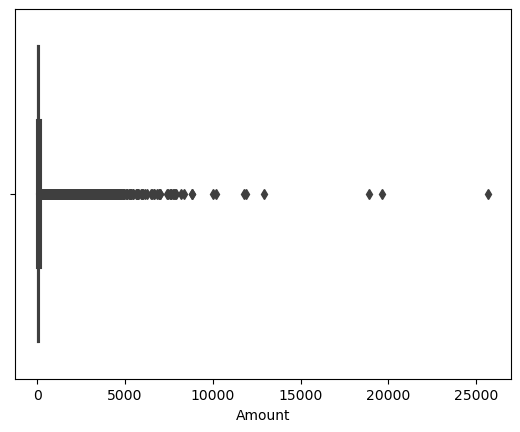

In [14]:
sns.boxplot(x=df['Amount'])

<Axes: xlabel='Class'>

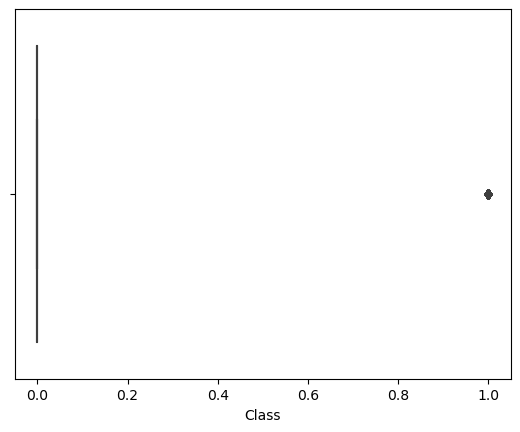

In [15]:
sns.boxplot(x=df['Class'])

## Handling Outliers

In [16]:
n_rows = len(df)
df = df[df.Amount < 500]
print("Removed " + str(n_rows - len(df)) + " rows")

Removed 9459 rows


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.123666,-0.014796,-0.430879,-0.107624,0.189983,-0.065894,0.097955,-0.038846,-0.004011,0.026622,-0.249938,0.129346,-0.067727,-0.105029,-0.189340,0.010698,-0.071496,0.092822,0.030057,-0.061370,0.048658,0.145570,0.068629,-0.014663,-0.237670,-0.039333,-0.006455,-0.010585,-0.018158,-0.012629
V1,0.123666,1.000000,-0.205225,-0.074825,0.050236,-0.088318,0.044833,0.113819,-0.039998,0.007808,-0.020426,0.010815,-0.001921,0.012048,-0.002884,0.013348,0.024755,-0.008733,-0.005797,-0.002090,0.000806,-0.004657,-0.018142,-0.024537,0.003890,-0.001001,-0.000924,0.010886,0.019732,-0.065649,-0.102056
V2,-0.014796,-0.205225,1.000000,-0.134865,0.087384,-0.127436,0.050746,0.211667,-0.034740,0.001255,-0.034823,0.008001,0.006627,0.015978,0.024003,0.014756,0.024619,0.010808,0.010973,-0.029137,0.275277,0.051255,-0.062698,-0.093246,0.006837,-0.024753,-0.002321,0.003347,0.067587,-0.371054,0.104478
V3,-0.430879,-0.074825,-0.134865,1.000000,0.029474,-0.094819,0.046479,0.113234,-0.037078,-0.015294,-0.024895,0.006486,-0.011008,0.005942,0.010709,0.006559,0.004434,-0.012785,-0.006665,-0.007098,0.042875,0.013564,-0.013535,-0.074478,0.005158,-0.017668,0.002470,0.010658,0.009987,-0.028766,-0.190728
V4,-0.107624,0.050236,0.087384,0.029474,1.000000,0.029701,-0.016397,-0.036050,0.009249,-0.001082,0.006166,-0.003370,0.002561,-0.004278,-0.001252,-0.006072,-0.007479,0.007646,-0.000603,0.006609,-0.044424,-0.008211,0.012519,0.035027,-0.002981,0.009842,-0.000269,-0.001465,-0.016700,-0.010651,0.131026
V5,0.189983,-0.088318,-0.127436,-0.094819,0.029701,1.000000,0.155283,0.286666,-0.063970,-0.017579,-0.059102,0.008492,-0.019101,0.006822,-0.006038,0.002762,0.022125,-0.007631,0.001960,-0.004968,0.027077,0.002415,-0.015083,-0.038126,0.009351,-0.018580,0.004065,0.055778,-0.031180,-0.201591,-0.098397
V6,-0.065894,0.044833,0.050746,0.046479,-0.016397,0.155283,1.000000,-0.175696,0.044853,0.006160,0.026941,-0.008540,0.007022,-0.004418,0.006391,-0.003276,-0.019810,0.000969,0.004387,0.002402,0.020316,0.008964,0.002842,0.003440,0.003112,0.009074,-0.002059,-0.044256,0.018931,0.098537,-0.048181
V7,0.097955,0.113819,0.211667,0.113234,-0.036050,0.286666,-0.175696,1.000000,0.049052,0.019670,0.043095,-0.006273,0.018058,-0.013919,-0.007280,-0.014457,-0.038987,0.003258,-0.014239,0.008626,-0.036431,-0.002910,0.001621,-0.056569,-0.006228,-0.006881,-0.008328,-0.069412,0.025811,0.043361,-0.210584
V8,-0.038846,-0.039998,-0.034740,-0.037078,0.009249,-0.063970,0.044853,0.049052,1.000000,-0.002704,-0.010656,0.006593,-0.004179,-0.000591,-0.003055,0.004113,0.008013,-0.005853,-0.003018,-0.002526,-0.030896,-0.004639,-0.006293,-0.066056,0.008583,-0.009424,0.000522,0.040515,0.000482,-0.013230,0.034889
V9,-0.004011,0.007808,0.001255,-0.015294,-0.001082,-0.017579,0.006160,0.019670,-0.002704,1.000000,-0.009560,-0.003996,-0.011760,-0.000761,0.010082,-0.007835,-0.008761,0.001094,0.005036,-0.005996,0.054322,0.010140,0.001381,0.035369,-0.000050,0.006546,0.005169,0.011403,-0.019502,-0.039723,-0.096069


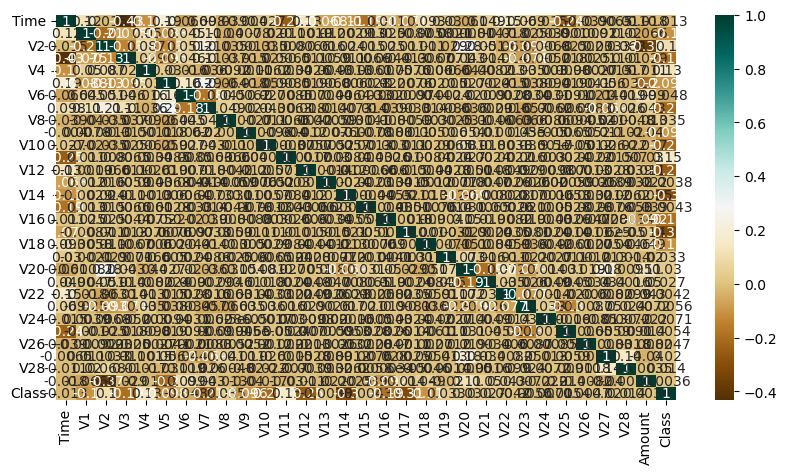

In [17]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

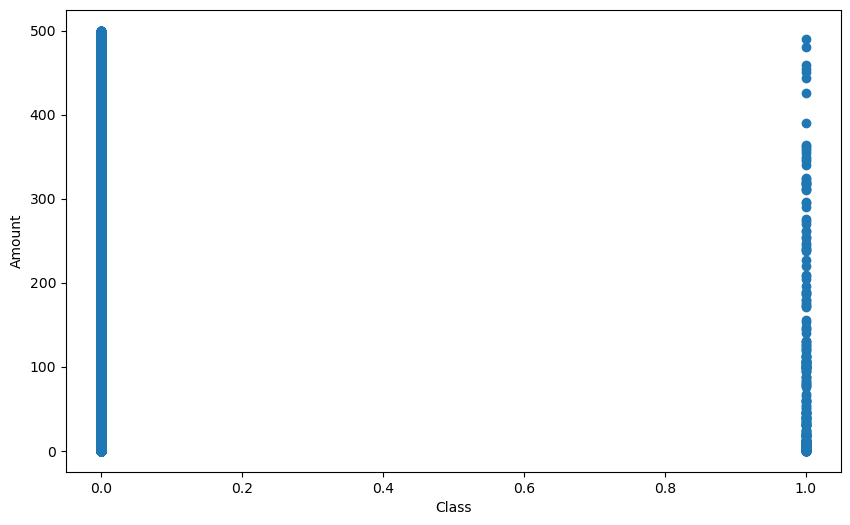

In [18]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Class'], df['Amount'])
ax.set_xlabel('Class')
ax.set_ylabel('Amount')
plt.show()

In [19]:
fraud=df[df['Class']==1]
non_fraud=df[df['Class']==0]

In [20]:
fraud.shape

(439, 31)

In [21]:
non_fraud.shape

(273828, 31)

In [22]:
df.describe().round()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,274267.0,274267.0,274267.0,274267.0,274267.0,274267.0,274267.0,274267.0,274267.0,274267.0,274267.0,274267.0,274267.0,274267.0,274267.0,274267.0,274267.0,274267.0,274267.0,274267.0,274267.0,274267.0,274267.0,274267.0,274267.0,274267.0,274267.0,274267.0,274267.0,274267.0,274267.0
mean,94875.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,56.0,0.0
std,47506.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,84.0,0.0
min,0.0,-47.0,-47.0,-34.0,-6.0,-24.0,-23.0,-44.0,-51.0,-13.0,-25.0,-5.0,-19.0,-4.0,-19.0,-4.0,-14.0,-25.0,-9.0,-5.0,-23.0,-23.0,-9.0,-37.0,-3.0,-7.0,-2.0,-23.0,-12.0,0.0,0.0
25%,54314.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.0,-1.0,-1.0,-1.0,-0.0,-1.0,-0.0,-1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,5.0,0.0
50%,84799.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,20.0,0.0
75%,139371.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0,0.0
max,172792.0,2.0,22.0,9.0,13.0,34.0,12.0,16.0,20.0,16.0,24.0,12.0,5.0,5.0,8.0,6.0,6.0,9.0,4.0,6.0,11.0,27.0,8.0,22.0,4.0,8.0,4.0,9.0,23.0,500.0,1.0


In [23]:
y = df["Class"]
X = df.drop("Class", axis=1)

## Train-Test Split

In [24]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=886)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
X_train.shape, X_test.shape

((219413, 30), (54854, 30))

In [26]:
y_train.shape, y_test.shape

((219413,), (54854,))

In [27]:
y_train.value_counts()

0    219058
1       355
Name: Class, dtype: int64

In [28]:
y_train.value_counts()/len(y_train)

0    0.998382
1    0.001618
Name: Class, dtype: float64

In [29]:
y_test.value_counts()/len(y_test)

0    0.998469
1    0.001531
Name: Class, dtype: float64

## Standardization

In [30]:
#from sklearn.preprocessing import StandardScaler
#Scaler_X = StandardScaler()
#X_train = Scaler_X.fit_transform(X_train)
#X_test = Scaler_X.transform(X_test)

## Oversampling method - SMOTE

In [31]:
from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({0: 219058, 1: 355})
After Counter({0: 219058, 1: 219058})


## Build RF Model

### Random Forest (with max_features = 'sqrt')

In [32]:
rf_mod = RandomForestClassifier(max_features = 'sqrt', random_state=886)

In [33]:
rf_mod.fit(X_train_sm, y_train_sm)

RandomForestClassifier(random_state=886)

In [34]:
print("Random Forest Train R2: ", rf_mod.score(X_train, y_train))
print("Random Forest Test R2: ", rf_mod.score(X_test, y_test))

Random Forest Train R2:  1.0
Random Forest Test R2:  0.9997083166223065


### Random Forest with cross validation on max_features

In [35]:
rf_mod.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 886,
 'verbose': 0,
 'warm_start': False}

In [36]:
param_grid = [
  {'max_features': [1, 2]} 
]

In [37]:
cv_grid_rf = GridSearchCV(rf_mod, param_grid, scoring="r2")

In [38]:
cv_grid_rf.fit(X_train_sm, y_train_sm)

GridSearchCV(estimator=RandomForestClassifier(random_state=886),
             param_grid=[{'max_features': [1, 2]}], scoring='r2')

In [39]:
pd.DataFrame(cv_grid_rf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,63.610141,1.922609,1.232310,0.016752,1,{'max_features': 1},0.999635,0.999680,0.999543,0.999498,0.999498,0.999571,0.000074,2
1,117.429617,1.943060,1.098582,0.020237,2,{'max_features': 2},0.999772,0.999772,0.999543,0.999635,0.999543,0.999653,0.000102,1


In [40]:
rf_mod_cvfinal = RandomForestClassifier(max_features=1, random_state=886)
rf_mod_cvfinal.fit(X_train, y_train)

RandomForestClassifier(max_features=1, random_state=886)

In [41]:
print("Random Forest with CV train R2: ", rf_mod_cvfinal.score(X_train, y_train))
print("Random Forest with CV test R2: ", rf_mod_cvfinal.score(X_test, y_test))

Random Forest with CV train R2:  1.0
Random Forest with CV test R2:  0.999653625988989


### Create a pickle

In [42]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("classifier_nov11.pkl","wb")
pickle.dump(rf_mod_cvfinal, pickle_out)
pickle_out.close()

### prediction

In [43]:
rf_mod_cvfinal.predict([[1,
-3.0435406239976,
-3.15730712090228,
1.08846277997285,
2.2886436183814,
1.35980512966107,
-1.06482252298131,
0.325574266158614,
-0.0677936531906277,
-0.270952836226548,
-0.838586564582682,
-0.414575448285725,
-0.503140859566824,
0.676501544635863,
-1.69202893305906,
2.00063483909015,
0.666779695901966,
0.599717413841732,
1.72532100745514,
0.283344830149495,
2.10233879259444,
0.661695924845707,
0.435477208966341,
1.37596574254306,
-0.293803152734021,
0.279798031841214,
-0.145361714815161,
-0.252773122530705,
0.0357642251788156,
52900]])

array([0])

### Feature Importance

In [44]:
importances = rf_mod_cvfinal.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = X_train.columns[0:]
 
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 50,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) V14                                                0.102428
 2) V12                                                0.090860
 3) V17                                                0.086858
 4) V10                                                0.068662
 5) V16                                                0.065928
 6) V11                                                0.064407
 7) V18                                                0.042196
 8) V4                                                 0.037422
 9) V9                                                 0.034810
10) V3                                                 0.032229
11) V7                                                 0.031711
12) V2                                                 0.026005
13) V5                                                 0.022942
14) V21                                                0.021798
15) V1                                                 0.021128
16) V6                                  

Text(0.5, 1.0, 'Feature Importance')

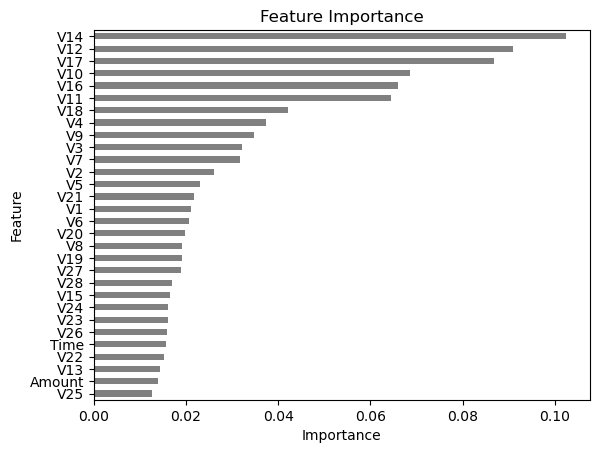

In [45]:
global_importances = pd.Series(rf_mod_cvfinal.feature_importances_, index=X_train.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='grey')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")